## Project title: Credit Card Dataset for Clustering

### Objective:

Businesses can use customer segmentation to develop custom products or services that 
target specific customer segments. The task will involve three activities, i.e., a) cluster the 
data to identify customer segments; b) use the identified customer segments to label the 
data; and c) build and deploy a classification model that can be used to identify a customer’s 
segment given an instance. Accurate identification of customer segments will ensure that the 
credit card issuer can push the most relevant products or services to the right customers.

### Data Description

Following is the Data Dictionary for Credit Card dataset :-

1. CUST_ID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases 
3. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFF_PURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment
7. CASH_ADVANCE : Cash in advance given by the user
8. PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
12. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
13. PURCHASES_TRX : Numbe of purchase transactions made
14. CREDIT_LIMIT : Limit of Credit Card for user
15. PAYMENTS : Amount of Payment done by user
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user
17. PRCFULLPAYMENT : Percent of full payment paid by user
18. TENURE : Tenure of credit card service for user

#### Libraries used:

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pickle
import os
from flask import Flask,render_template,request,flash

import warnings 
warnings.filterwarnings("ignore")

### Data Loading

In [144]:
data=pd.read_csv("CC GENERAL.csv")

### EXploratory Data Analysis

In [145]:
data.shape

(8950, 18)

In [146]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [147]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [148]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [149]:
data=data[[ 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

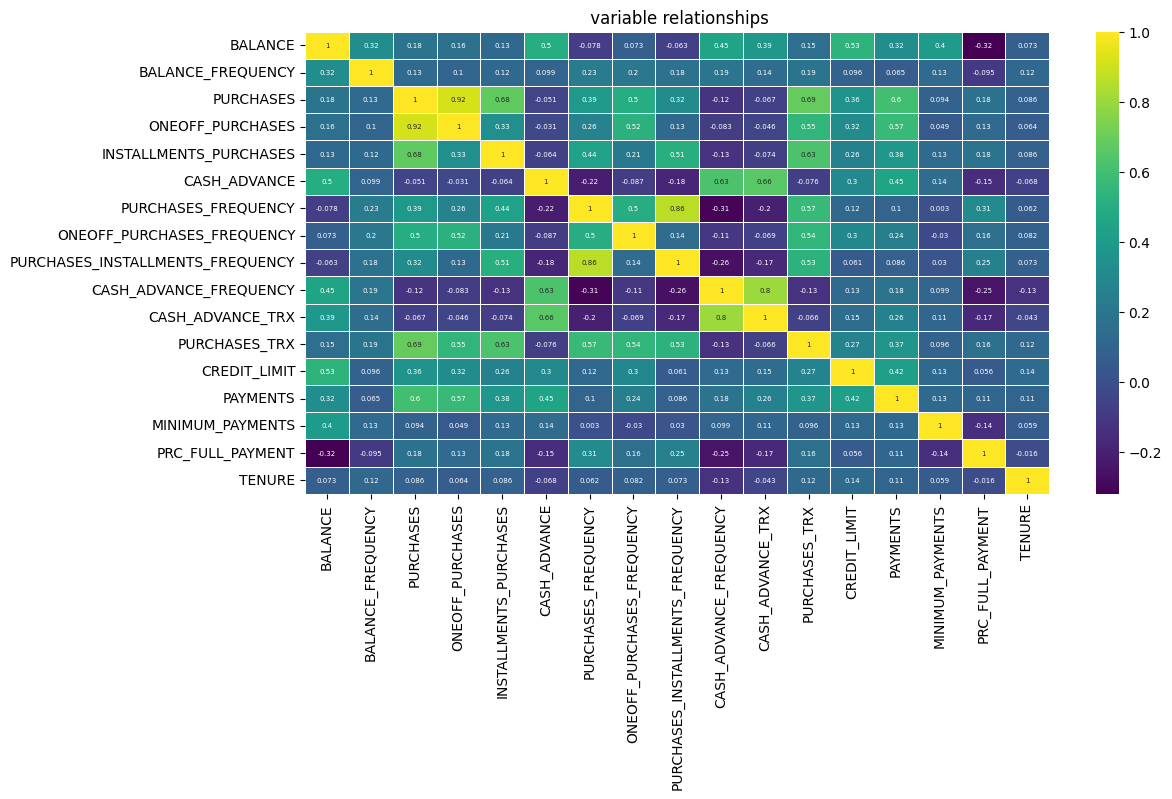

In [150]:
# data.corr()
corr_mat=data.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_mat,linewidth=0.5,cmap='viridis',annot=True, annot_kws={'size': 5})
plt.title(" variable relationships");

#### Checking missing values

In [151]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The following function, named percent_missing, is designed to calculate the percentage of missing values for each column in our dataset

In [152]:
def percent_missing(d):
    percent_nan = 100* d.isnull().sum() / len(d)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [153]:
percent_missing(data)

CREDIT_LIMIT        0.011173
MINIMUM_PAYMENTS    3.497207
dtype: float64

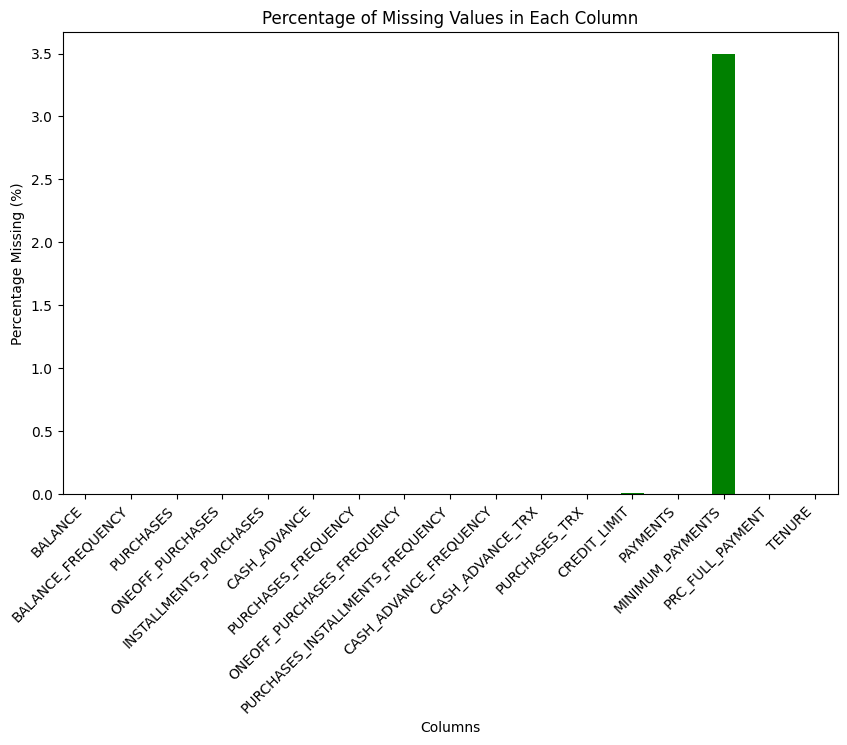

In [154]:
def percent_missing(d):
    percent_nan = 100 * d.isnull().sum() / len(d)
    return percent_nan

# Calculate the percentage of missing values for each column
missing_percentages = percent_missing(data)

# Plotting the missing values as a bar chart
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar', color='green')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Checking for outliers

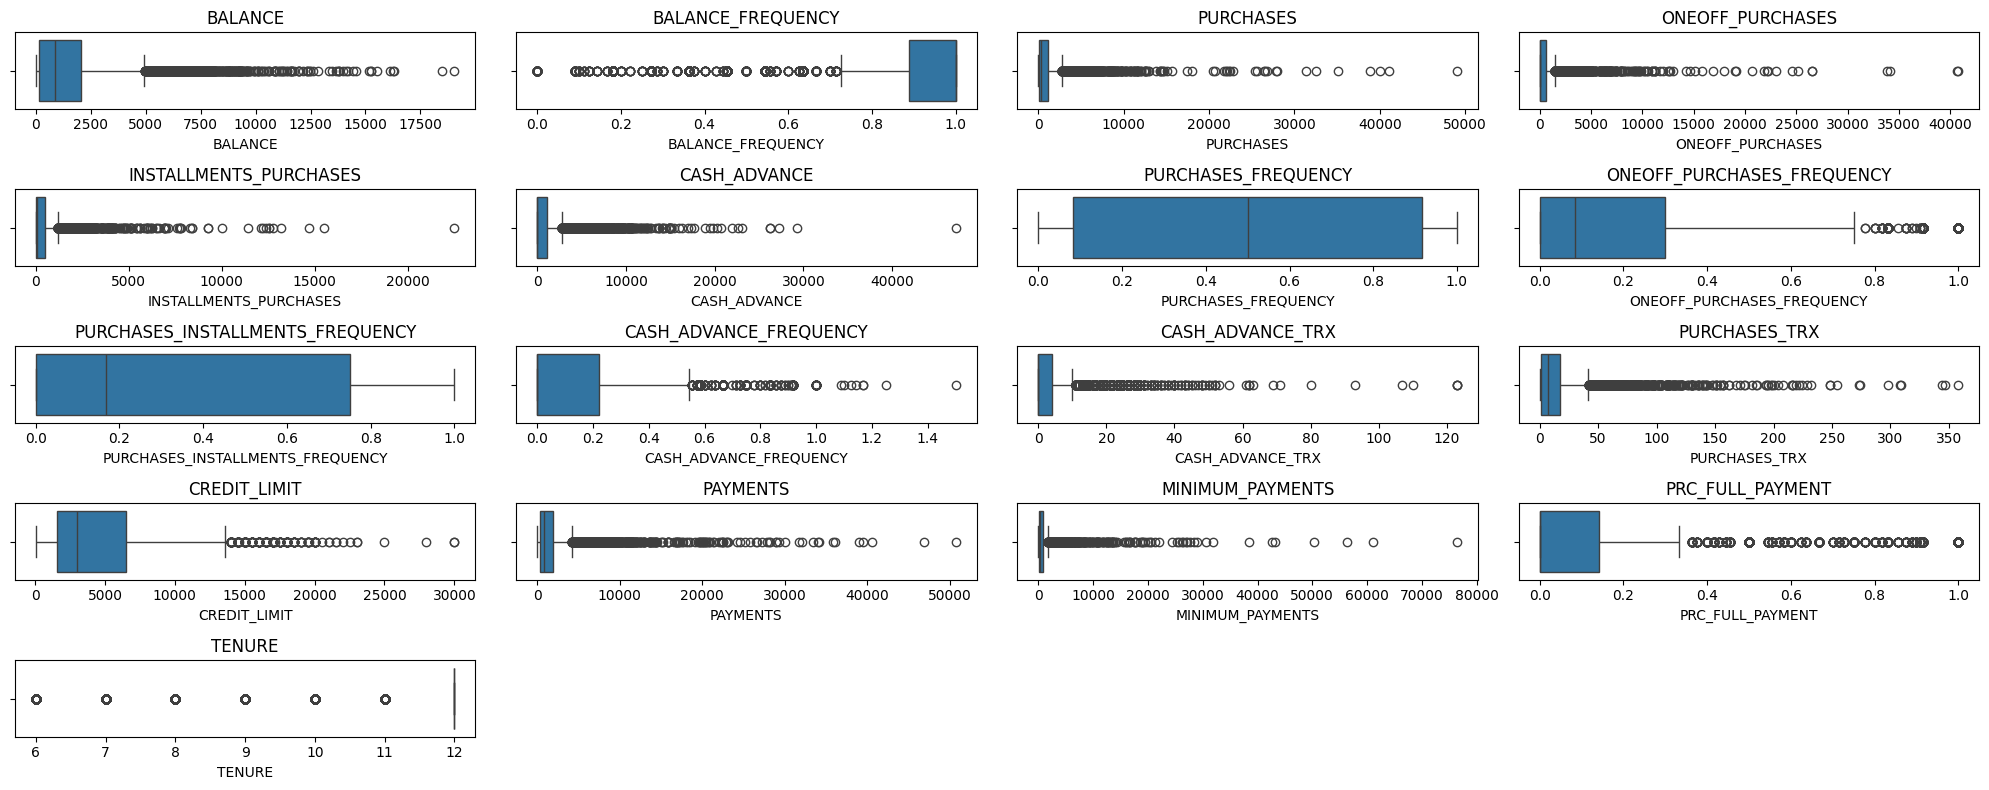

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = data.columns

plt.figure(figsize=(20, 8))

for i, column in enumerate(columns, start=1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [156]:
import numpy as np

def outlier_percentage(data):
    '''
    This function calculates the percentage of outliers in a dataset.
    '''
    quantile_1 = data.quantile(0.25)
    quantile_3 = data.quantile(0.75)
    IQR = quantile_3 - quantile_1
    lower_treshold = quantile_1 - (1.5 * IQR)
    upper_threshold = quantile_3 + (1.5 * IQR)
    num_outliers = np.sum((data < lower_treshold) | (data > upper_threshold))
    num_data = data.count()

    if num_data == 0:
        return 0  # Avoid division by zero if there is no data

    return (num_outliers / num_data) * 100


In [157]:
def show_outlier(data):
    '''
    This function shows the percentage of outliers in each numerical column.
    '''
    percentages = [] 
    columns = [] 

    for column in data.columns:
        data_section = data[column]
        percent = round(outlier_percentage(data_section), 2)
        print(f'Outlier in column "{column}": {percent}%')

        # Store values for plotting
        columns.append(column)
        percentages.append(percent)

    plt.figure(figsize=(10,6))
    plt.bar(columns, percentages,color='green')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Outliers')
    plt.title('Percentage of Outliers in Each Numerical Column')
    plt.xticks(rotation=90)
    plt.show()

Outlier in column "BALANCE": 7.77%
Outlier in column "BALANCE_FREQUENCY": 16.68%
Outlier in column "PURCHASES": 9.03%
Outlier in column "ONEOFF_PURCHASES": 11.32%
Outlier in column "INSTALLMENTS_PURCHASES": 9.69%
Outlier in column "CASH_ADVANCE": 11.51%
Outlier in column "PURCHASES_FREQUENCY": 0.0%
Outlier in column "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outlier in column "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outlier in column "CASH_ADVANCE_FREQUENCY": 5.87%
Outlier in column "CASH_ADVANCE_TRX": 8.98%
Outlier in column "PURCHASES_TRX": 8.56%
Outlier in column "CREDIT_LIMIT": 2.77%
Outlier in column "PAYMENTS": 9.03%
Outlier in column "MINIMUM_PAYMENTS": 9.74%
Outlier in column "PRC_FULL_PAYMENT": 16.47%
Outlier in column "TENURE": 15.26%


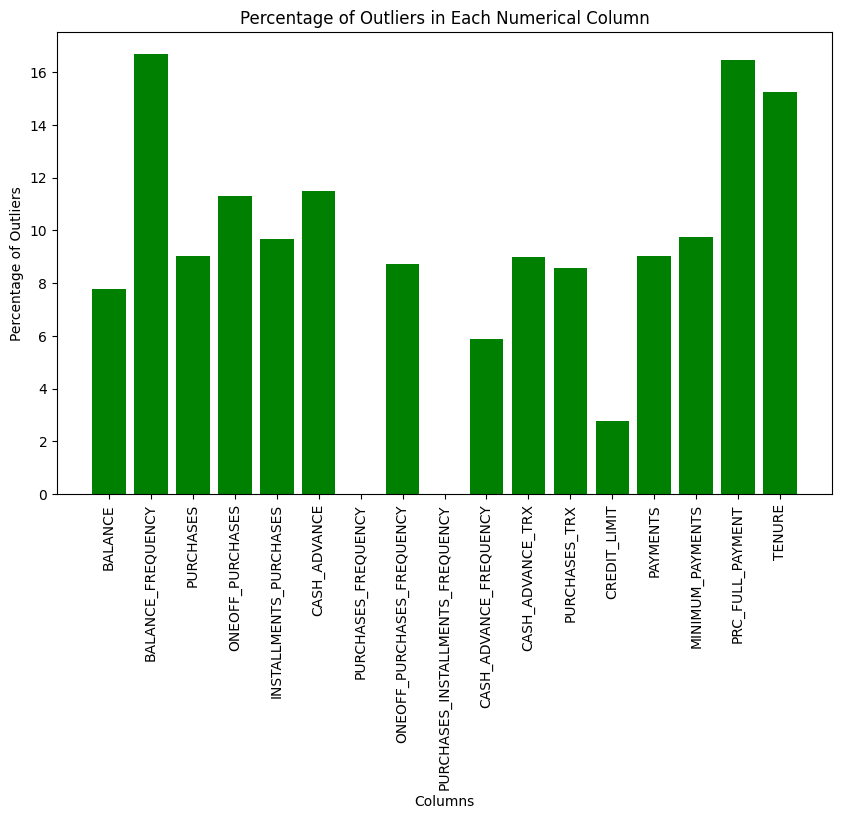

In [158]:
# Example usage
show_outlier(data)

In [159]:
data['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

#### variables Distributions

In [160]:
def variable_distribution(data, variable_name, colour):
    fig, (ax_hist, ax_kde) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10, 6))
    sns.histplot(data[variable_name], bins=50, kde=False, color=colour, ax=ax_hist)
    mean = data[variable_name].mean()
    std = data[variable_name].std()
    ax_hist.set_title(variable_name)
    ax_hist.set_ylabel('Frequency')
    sns.kdeplot(data[variable_name], color=colour, ax=ax_kde)
    ax_kde.set_xlabel(variable_name)
    ax_kde.set_ylabel('Density')

    print(f"The variable {variable_name} presented a mean of {mean} USD with a standard deviation of {std} USD")

    plt.tight_layout()
    plt.show()

##### Balance

The variable BALANCE presented a mean of 1564.4748276781006 USD with a standard deviation of 2081.5318794565546 USD


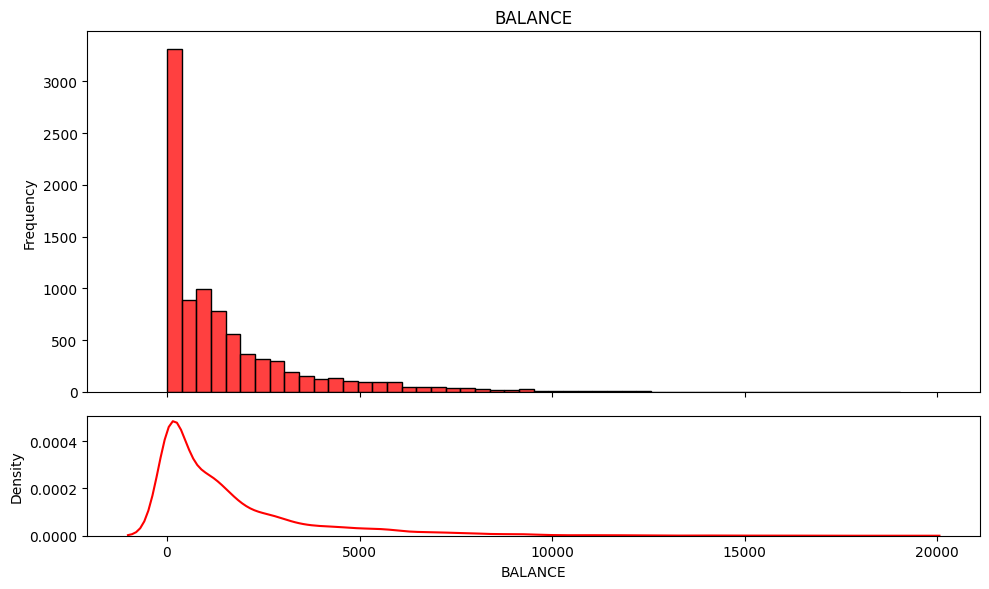

In [161]:
variable_distribution(data,variable_name='BALANCE',colour='red')

##### Purchase

The variable PURCHASES presented a mean of 1003.2048335195531 USD with a standard deviation of 2136.6347818728887 USD


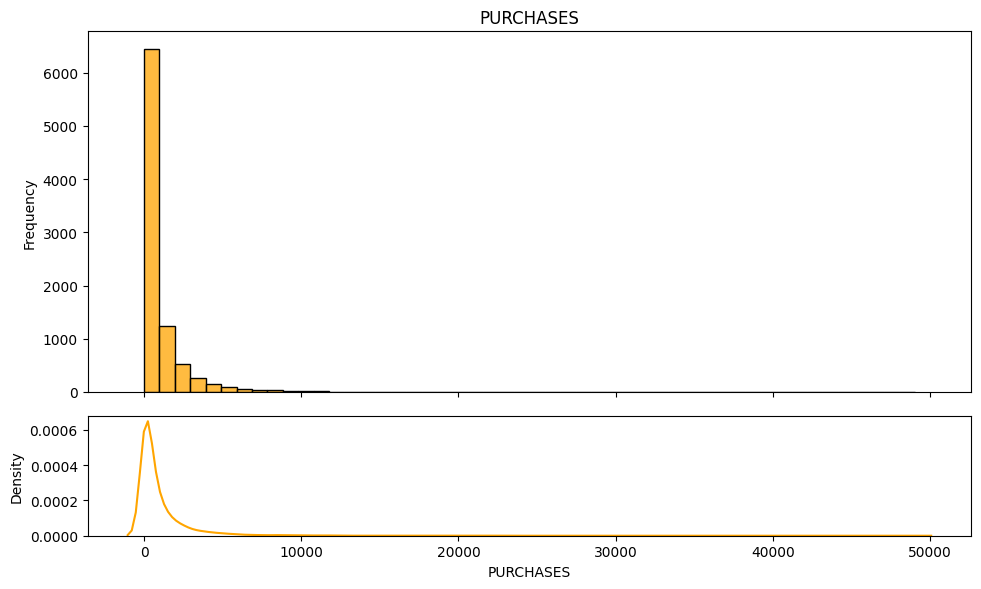

In [162]:
variable_distribution(data,variable_name='PURCHASES',colour='orange')

##### CASH_ADVANCE

The variable CASH_ADVANCE presented a mean of 978.8711124654749 USD with a standard deviation of 2097.163876643234 USD


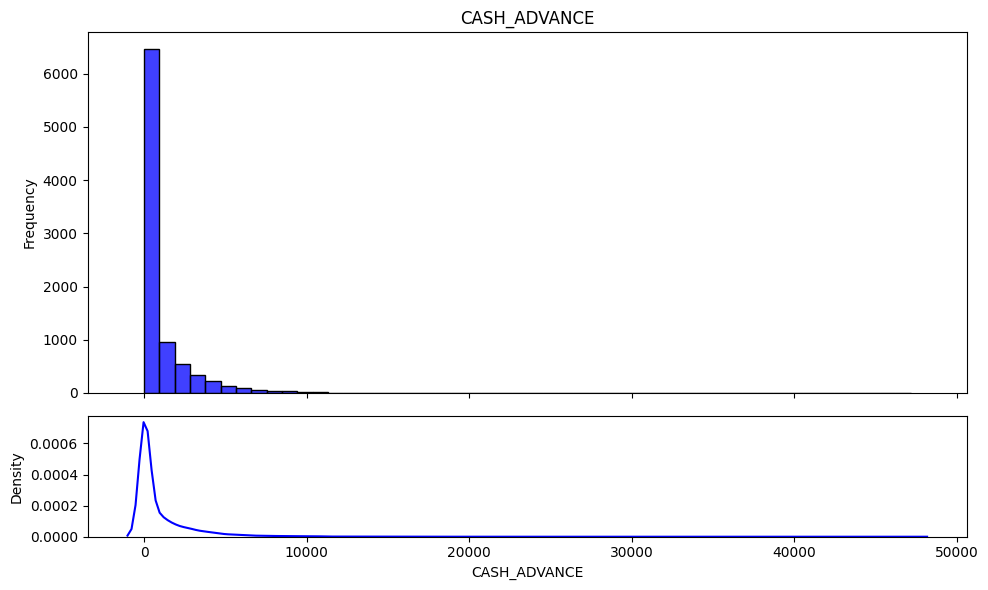

In [163]:
variable_distribution(data,variable_name='CASH_ADVANCE',colour='blue')

##### Payment

The variable PAYMENTS presented a mean of 1733.1438520248046 USD with a standard deviation of 2895.063756904574 USD


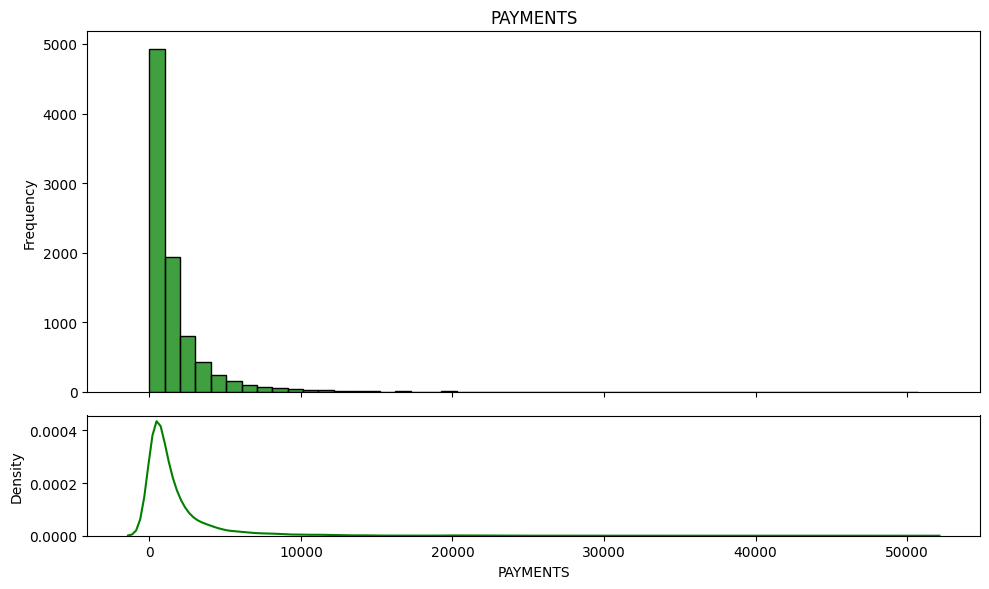

In [164]:
variable_distribution(data,variable_name='PAYMENTS',colour='green')

#### Minimum Payments

The variable MINIMUM_PAYMENTS presented a mean of 864.2065423050828 USD with a standard deviation of 2372.4466065839747 USD


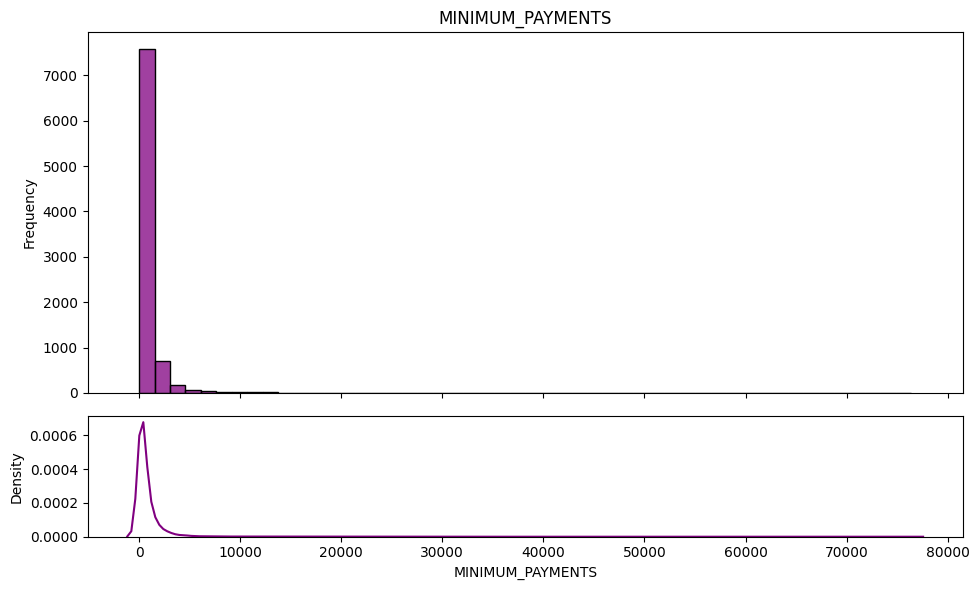

In [165]:
variable_distribution(data,variable_name='MINIMUM_PAYMENTS',colour='purple')

#### Credits Limits

The variable CREDIT_LIMIT presented a mean of 4494.449450364621 USD with a standard deviation of 3638.8157254984967 USD


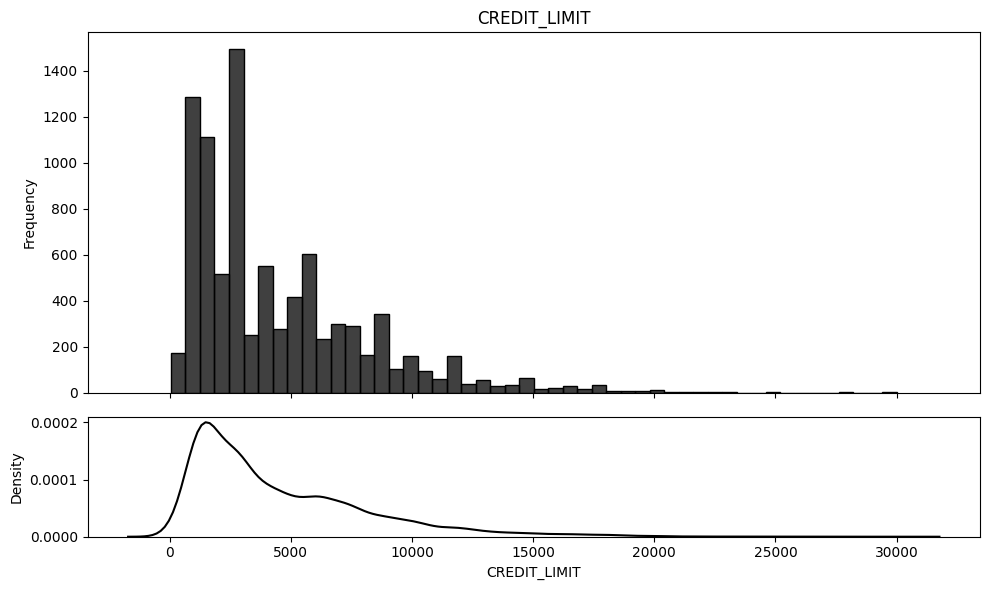

In [166]:
variable_distribution(data,variable_name='CREDIT_LIMIT',colour='black')

### Data Preprocessing


##### 1. Handling missing values
Our dataset has two columns with missing values, specifically CREDIT_LIMIT and MINIMUM_PAYMENTS. We will address these missing values individually based on our domain knowledge. One missing value has been identified in the CREDIT_LIMIT column. In financial institutions like banks, the credit limit can be determined from CASH_ADVANCE. Typically, CASH_ADVANCE constitutes 30% of the CREDIT_LIMIT in such cases. Therefore, There are 313 missing values found in MNIMUM_PAYAMENTS column and this was filled using the average value

In [167]:
# Filling the missing values with their average value
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data["CASH_ADVANCE"]/0.3)
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

##### 2. Data Scaling


As seen in our data analysis, our dataset has a lot of variation. This can pose an issue for distance-based algorithms like K-Means, which we plan to use for clustering customers. To address this, we'll perform data scaling. Specifically, we'll use MIN MAX SCALING to put our data within a consistent range (between 0 and 1). While this approach limits the range of our data (unlike some other scaling methods), it also reduces the impact of outliers, which are plentiful in our dataset, by giving us smaller standard deviations.

In [168]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

##### 3. Outlier Droping

Based on the patterns observed in the previous data distribution and the identification of outliers through the IQR calculation, we notice a considerable number of outliers. Removing these outliers is likely to have a significant impact on our modeling. Therefore, we opt for an alternative method to identify outliers, namely the Z-score. The Z-score indicates how many standard deviations an observation is from the mean. If an observation is significantly away from the average, it is flagged as an outlier. In this instance, we will use a Z-score threshold of 3, suggesting that we will retain only the data points that are less than 3 standard deviations away from the mean.

In [169]:

selected_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                    'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                    'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# z_minmax = np.abs(stats.zscore(data_scaled))
# df_scaled = pd.DataFrame(data_scaled[(z_minmax < 3).all(axis=1)], columns=selected_columns)
# df_scaled_shape = df_scaled.shape
# print()
# print("Shape of the filtered DataFrame:", df_scaled_shape)


z_minmax = np.abs(stats.zscore(data_scaled))
outlier_mask = (z_minmax < 3).all(axis=1)
filtered_data = data[outlier_mask]
removed_rows = data[~outlier_mask]

# Step 3: Create a DataFrame with the selected columns
df_scaled = pd.DataFrame(filtered_data, columns=selected_columns)
print("Indices of Removed Rows:")
print(removed_rows.index)


Indices of Removed Rows:
Index([   6,   19,   20,   21,   23,   28,   30,   34,   36,   39,
       ...
       8940, 8941, 8942, 8943, 8944, 8945, 8946, 8947, 8948, 8949],
      dtype='int64', length=1516)


In [170]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Feature Selection and Feature engineering

As our dataset contains many features (17 features), we aim to decrease the number of features to a smaller set that is useful for clustering analysis. To achieve this, we'll use PCA, which helps in simplifying the features the computer needs to handle. This reduction is helpful because it not only makes the computations more efficient but also improves the performance of the machine learning model by addressing issues like multicollinearity.

##### Dimensionality reduction using PCA

In [171]:
pca = PCA(random_state=42).fit(df_scaled)
pca_data = pca.transform(df_scaled) 
pca_labels= []

for component in range(1,len(pca.components_)+1):
    labels = 'PC' + str(component)
    pca_labels.append(labels) 

In [172]:
pca_df = pd.DataFrame(pca_data, columns=pca_labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-3543.061152,-498.263012,-432.706741,169.969046,13.777979,-113.222734,26.785580,-3.017302,-0.211978,-1.006348,-0.390963,0.282870,-0.104486,-0.014542,-0.024295,-0.040673,0.026443
1,4503.407560,4493.388363,272.250168,3475.071101,-1475.599731,442.771007,95.039274,1.030120,0.091965,-10.418559,-0.681726,0.039346,0.157961,0.004426,-0.131396,0.024415,0.004769
2,3334.004282,-821.357184,-1334.513920,-959.589754,238.158738,-536.029516,220.532576,1.237444,-0.135818,-0.987030,-0.090465,-0.256557,-0.048364,0.778090,0.321151,-0.120961,-0.022343
3,3181.058207,-1522.200832,-1045.366370,-1222.575674,-777.292937,-36.569288,747.196096,-15.621975,0.076815,-0.020040,-0.310040,0.205160,-0.078278,-0.368104,0.073662,0.009777,-0.029868
4,-3063.311303,119.714304,-311.474499,-35.592697,384.789606,-412.393153,-6.500007,-2.705158,-0.170652,-1.318207,-0.322425,0.276797,-0.057686,0.103799,-0.143789,-0.006691,0.063557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,-3916.916885,-300.614117,-159.675275,-85.551803,-410.138357,-236.043447,183.931995,0.429038,-0.204663,1.483756,3.580703,0.164338,-0.109279,0.380919,0.197031,-0.045193,0.007723
7430,-3559.816380,-546.514261,-492.184042,85.211421,-86.392164,-86.564795,-48.244257,0.837485,-0.260388,-1.033660,3.629282,-0.461857,-0.356514,-0.055536,-0.006426,-0.063829,0.020755
7431,-3002.778250,673.879801,-766.849479,301.097148,-554.121132,-85.572298,37.099549,-2.865362,-0.145803,-0.704479,3.498947,0.381444,-0.060443,-0.032173,-0.028624,0.012980,0.066869
7432,-3474.375572,-517.340611,-249.035415,-68.485826,-144.519152,42.991271,-296.344977,-4.711267,-0.205595,-0.938027,3.611819,-0.247327,-0.332348,0.069248,-0.123977,-0.072075,0.032584


In [173]:
explained_var_ratio_per_PCA = np.round(pca.explained_variance_ratio_ * 100, decimals=1) 
explained_var_ratio_per_PCA_df = pd.DataFrame(pca.explained_variance_ratio_ * 100, index= pca_labels)
explained_var_ratio_per_PCA_df.head()

,0
PC1,57.160118
PC2,15.941204
PC3,12.959965
PC4,7.013615
PC5,3.525330


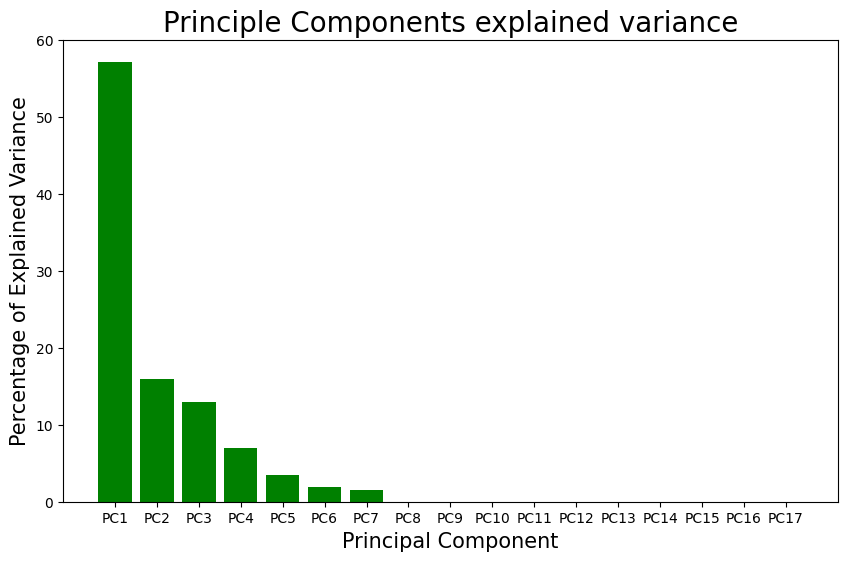

In [174]:
fig = plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_var_ratio_per_PCA)+1), height=explained_var_ratio_per_PCA, tick_label=pca_labels,color='green')
plt.ylabel('Percentage of Explained Variance', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Principle Components explained variance', fontsize=20)
plt.show()

In [175]:
print(f"Total variation explained by PC1 and PC2 is :{pca.explained_variance_ratio_[:2].sum()*100}")

Total variation explained by PC1 and PC2 is :73.10132204082805


### Model development

##### 1. K-Means Clustering

To justify the selection of the number of clusters, we will then calculate inertia by using the elbow method. Inertia measures how well a dataset is clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. What we look for is the point where the decrease in inertia begins to slow down.

In [176]:
cluster_data=pca_df[['PC1','PC2']]

In [177]:
cluster_data.head()

,PC1,PC2
0,-3543.061152,-498.263012
1,4503.407560,4493.388363
2,3334.004282,-821.357184
3,3181.058207,-1522.200832
4,-3063.311303,119.714304


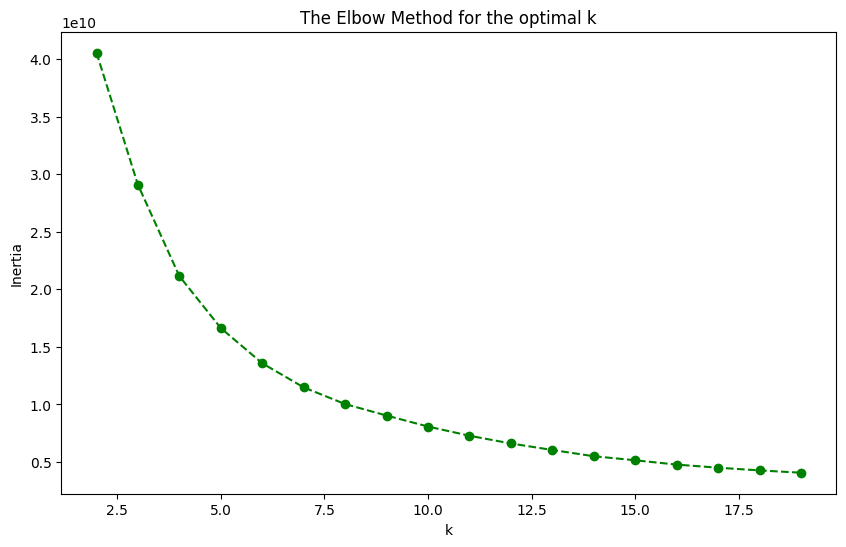

In [178]:
inertia = []
nbr_clusters = np.arange(2,20)
for k in nbr_clusters:
    kmean_Model = KMeans(n_clusters=k)
    kmean_Model.fit(cluster_data)
    inertia.append(kmean_Model.inertia_)

plt.figure(figsize=(10,6))
plt.plot(nbr_clusters, inertia, 'o--',color='green')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method for the optimal k')
plt.show()

To help us decide on the number of clusters, we'll use another measure called the Silhouette Score. This score assesses how well the clusters are formed by considering how closely samples within a cluster resemble each other. The score ranges from -1 to 1. A score of 1 suggests that the cluster is compact and distinct from others. A score close to 0 indicates overlapping clusters, where samples are near the boundary between neighboring clusters. A negative score suggests that some samples might be placed in the wrong clusters.

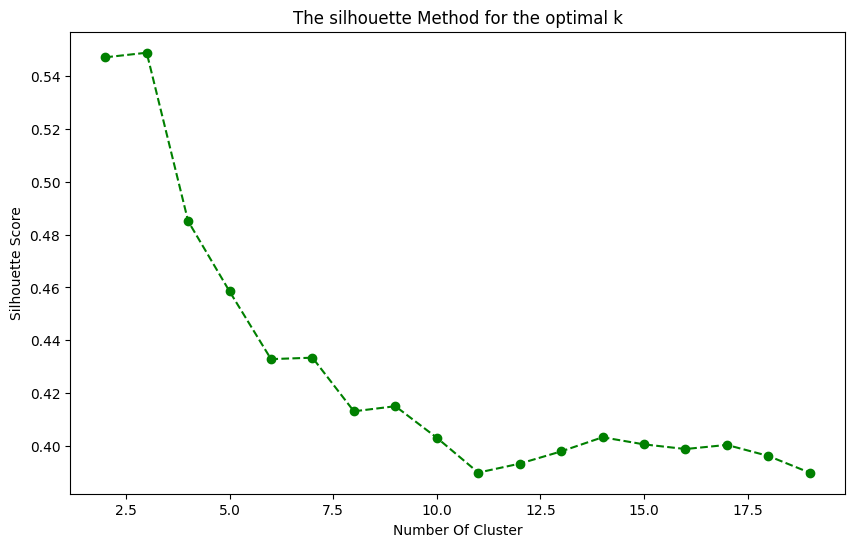

In [179]:
silhouette_scores = []

for i in nbr_clusters:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(cluster_data)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(cluster_data, labels, metric = 'euclidean'))
  
plt.figure(figsize=(10,6))
plt.plot(nbr_clusters, silhouette_scores, 'o--',color='green')

plt.title('The silhouette Method for the optimal k')
plt.xlabel('Number Of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Based on the outcomes of the two metrics, it makes sense to choose three clusters. This decision is supported by the observation that the decrease in inertia slows down at k=3, and the highest silhouette score is achieved when the number of clusters is set to 3.

In [180]:
k_means = KMeans(n_clusters=3).fit(cluster_data)
cluster_center = k_means.cluster_centers_
cluster_preds = k_means.predict(cluster_data)

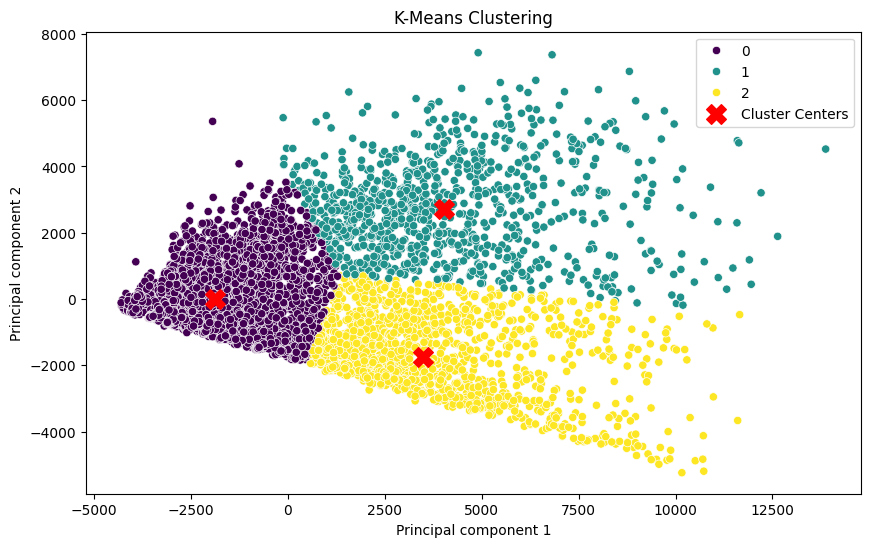

In [181]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'PC1', y = 'PC2', hue = cluster_preds, data = cluster_data,palette='viridis')
plt.scatter(cluster_center[:, 0], cluster_center[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()
plt.show()

##### Data Labeling

After dividing the data into groups, we assigned labels to each part based on their clusters. Not all the data received labels because some extreme values were removed (outliers). This implies that only the data points without extreme values were labeled, and they were grouped into three different clusters.

In [182]:
labeled_data = data.drop(removed_rows.index)
print("Updated DataFrame after removing rows with outliers:")
len(labeled_data)

Updated DataFrame after removing rows with outliers:


7434

In [183]:
clusters_kmeans = k_means.labels_
labeled_data["cluster"] = clusters_kmeans
labeled_data["cluster"] = labeled_data["cluster"] + 1
labeled_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [184]:
# Save the labeled dataset to a CSV file
labeled_data.to_csv('ltuyish-cc-labeled.csv', index=False)

### Supervised Learning (building and deploying a classification model )

#### Model Development

In this section several different machine models such as logistic regression, decision tree, support vector machine and random forest were used in order to determine the best model that can learn our data and generilize on new data. 'cross_val_score'  a function provided by the scikit-learn library in Python was used to perform cross-validation. By using multiple folds(we used 10 folds), the function helps prevent overfitting to a specific training-test split, providing a more robust assessment of the model's generalization performance. In order to track how our model is learning  a graphical representation that shows how the performance of a machine learning model changes over time or as the size of the training dataset increases was used through a scikit-learn library called learning curve.

In [185]:
X=labeled_data.drop('cluster',axis=1)
y=labeled_data['cluster']  

In [186]:
def plot_learning_curve(estimator, X, y, cv, title, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

##### 1. Logistic Regression

In [188]:
log_model = LogisticRegression()

In [189]:
log_cv_scores = cross_val_score(log_model, X, y, cv=10).mean()
log_cv_scores 

0.9257456692571528

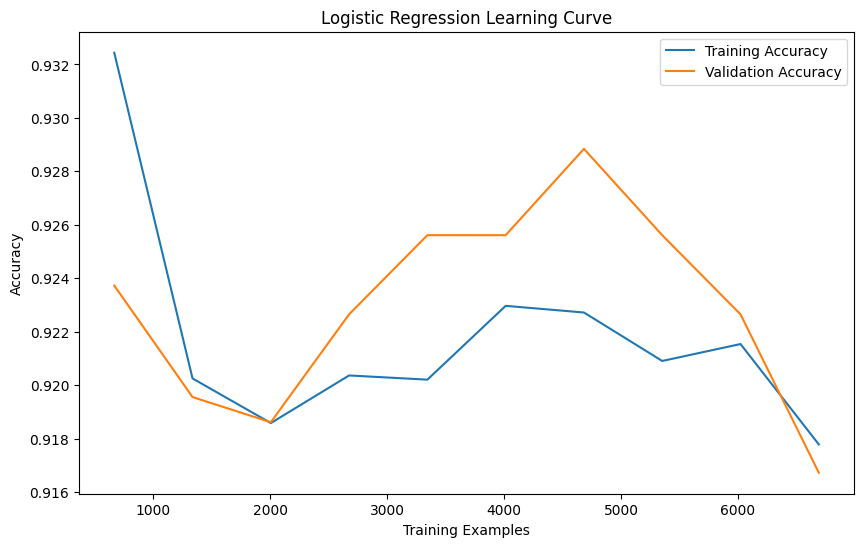

In [190]:
plot_learning_curve(log_model, X, y, cv=10,title='Logistic Regression Learning Curve')

##### 2. Support vector machine

In [191]:
# svm_model = SVC(kernel='linear', C=1.0) 
svm_model = SVC()

In [192]:
svm_cv_scores = cross_val_score(svm_model, X, y, cv=10).mean() 
svm_cv_scores

0.990180031548937

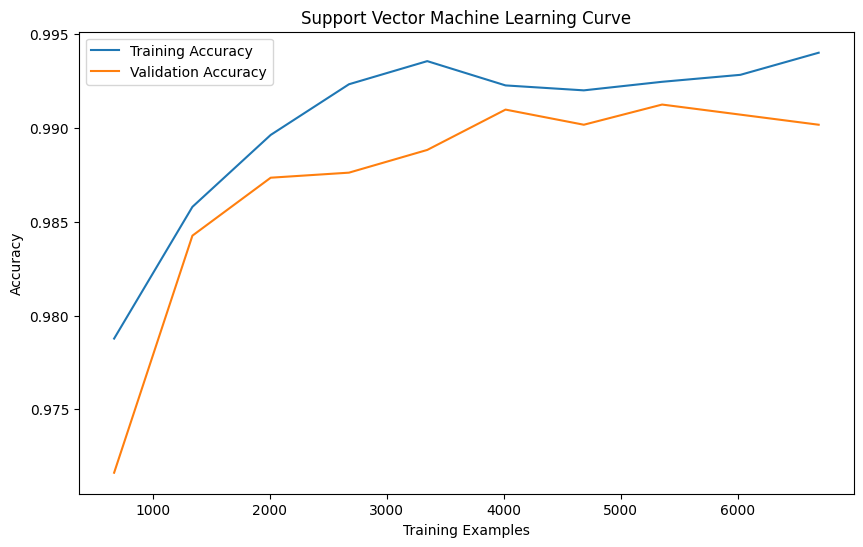

In [193]:
plot_learning_curve(svm_model, X, y, cv=10,title='Support Vector Machine Learning Curve')

##### 3. Decision Tree

In [194]:
dcs_model = DecisionTreeClassifier(random_state=42)

In [195]:
dcs_cv_scores = cross_val_score(dcs_model, X, y, cv=10).mean()
dcs_cv_scores

0.9709453103518142

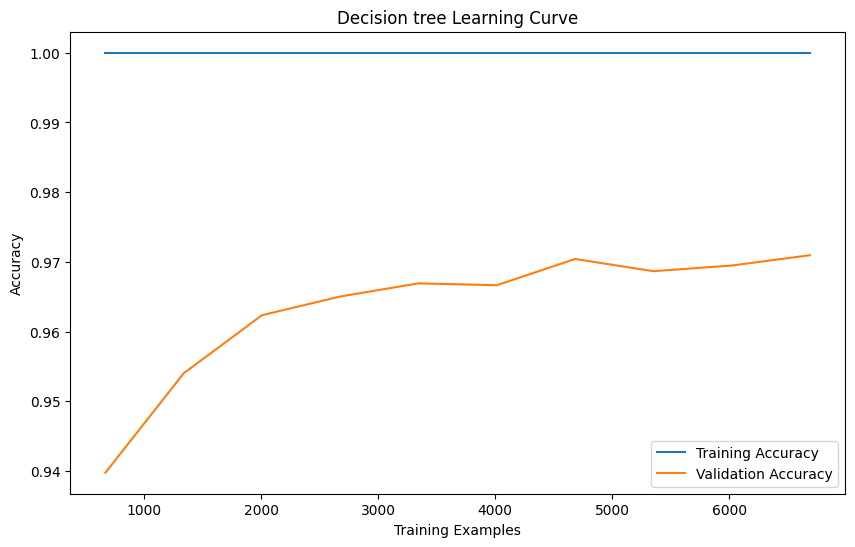

In [196]:
plot_learning_curve(dcs_model, X, y, cv=10,title='Decision tree Learning Curve')

##### 4. Random Forest

In [197]:
rf_classifier = RandomForestClassifier()
rf_cross_val_scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy').mean()
rf_cross_val_scores

0.978344476765221

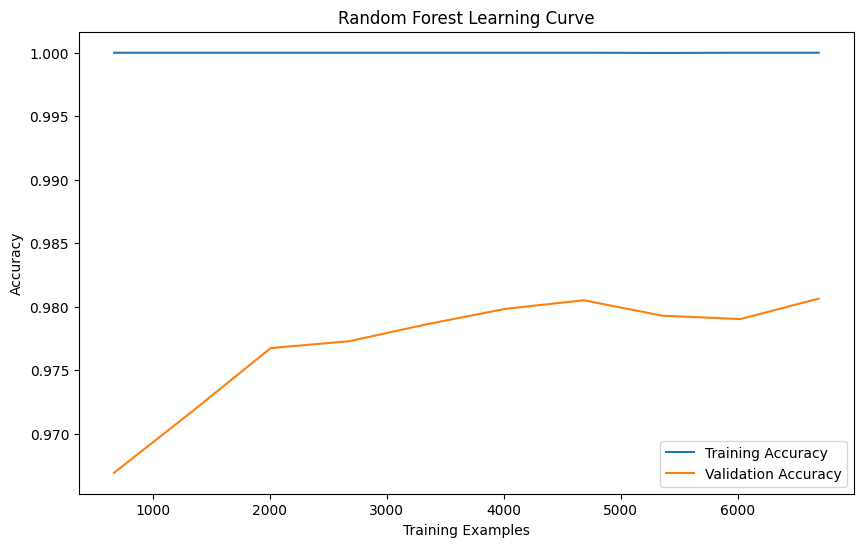

In [198]:
plot_learning_curve(rf_classifier, X, y, cv=10,title='Random Forest Learning Curve')

#### Model Comparison

The learning curves we looked at suggest that both the decision tree and random forest models may be trying too hard to fit the training data. This is because they perform much better on the training set compared to the testing set, indicating potential overfitting. On the other hand, the logistic regression model sometimes does better on the testing set than on the training set, which is not a good sign. This could mean the model is getting lucky on the test data, and its actual ability to generalize might not be as good. Interestingly, the support vector machine seems to be doing better than the other models. Its learning curve graph shows evidence of good generalization, meaning it performs well not just on the training data but also on new, unseen data.

In [199]:
cross_val_scores=[log_cv_scores,svm_cv_scores,dcs_cv_scores,rf_cross_val_scores]
model_name=['Logistic regression','Support vector Machine','Decision Tree','Random Forest']

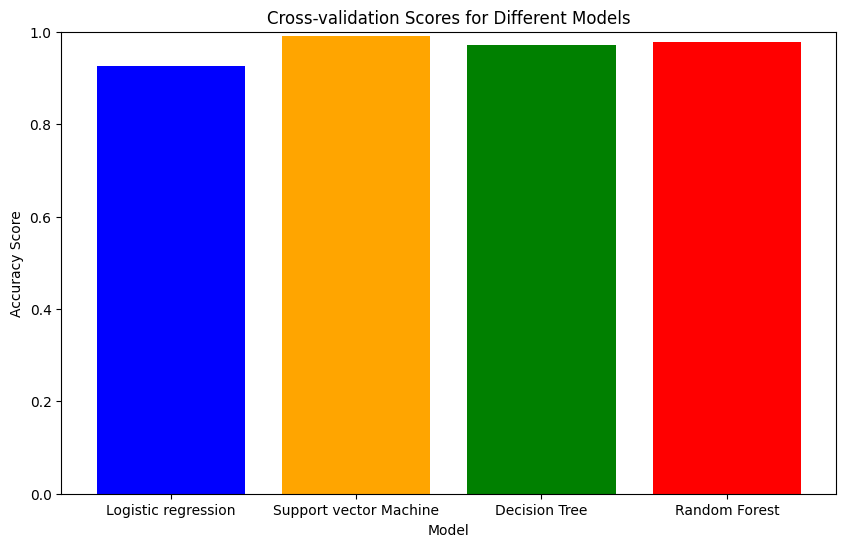

In [200]:
plt.figure(figsize=(10, 6))
plt.bar(model_name, cross_val_scores, color=['blue', 'orange', 'green', 'red'])
plt.ylim([0, 1]) 
plt.title('Cross-validation Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.show()

#### Hyperparemeter Tuning

In [201]:
svm_model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_model_cv_score = grid_search.best_score_

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Cross-validated Score:", best_model_cv_score)


Best Hyperparameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best Cross-validated Score: 0.9987894180813036


In [202]:
model=SVC(C= 0.1, gamma= 0.01, kernel= 'linear').fit(X,y)
score = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
score

0.9987894180813036

#### Feature Selection

In [216]:
pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear'))
param_grid = {'svc__C': [0.1, 1, 10], 'svc__gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)
best_model = grid_search.best_estimator_


# Extract feature importances for linear kernel
if best_model.named_steps['svc'].kernel == 'linear':
    feature_importances = best_model.named_steps['svc'].coef_[0]
    print("Feature importances:", feature_importances)
else:
    print("Feature importances are not available for non-linear kernels.")

# Calculate the cross-validated accuracy score using the best model
cross_val_accuracy = cross_val_score(best_model, X, y, cv=10, scoring='accuracy').mean()
print("Cross-validated accuracy score:", cross_val_accuracy)


Best hyperparameters: {'svc__C': 10, 'svc__gamma': 0.01}
Feature importances: [ -6.01621073   0.15072019  -0.3468979   -0.17908243  -0.42214493
  -3.32004352  -0.47114471   0.67041153   1.14276999   0.15385666
   0.1150337   -0.69906581 -14.05258268  -2.83790045  -0.86101613
  -0.545767    -0.12975144]
Cross-validated accuracy score: 0.9962331220422872


Grid search CV was employed to analyze the significance of each parameter. The findings revealed that every variable is essential for classification. If a variable's importance is not zero, it means that the variable is valuable for classification, and this was true for all variables.

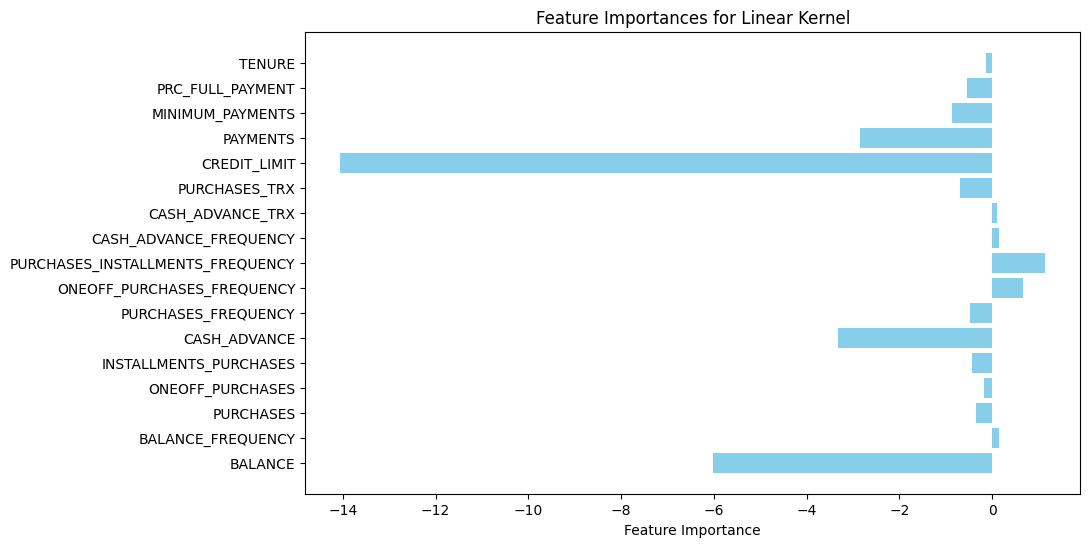

In [217]:
if best_model.named_steps['svc'].kernel == 'linear':
    # Get feature names from X
    feature_names = X.columns  # Assuming X is a DataFrame

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importances')
    plt.show()
else:
    print("Feature importances are not available for non-linear kernels.")

#### Model Deployment

In [203]:
directory = 'saved-models'
# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model to the specified file
with open(os.path.join(directory, 'model.pkl'), 'wb') as model_file:
    pickle.dump(model, model_file)

In [204]:
pickle.dump(model, open('saved-models/model.pkl','wb')) #This is the model we will load on the server

In [205]:
model = pickle.load(open('saved-models/model.pkl','rb'))
print(model.predict([[40.9,0.81,95.4,0.00,95.40,0.00,0.16667,0.000,0.08333,0.000,0,2,1000,201.80,139.509,0.00,12]]))

[1]


In [206]:
X.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [211]:
app=Flask(__name__) #creates the app to process the user input
#Configure the app
app.logger.setLevel('INFO')
app.secret_key = "project"

#Define the functions that represent the actions that occur as the user interacts with the app.
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['GET','POST'])
def predict():
    if request.method =='POST':
        
        """BALANCE', 'BALANCE_FREQUENCY',
       'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'"""
        try:
            #Retrieve the form inputs
            BALANCE=float(request.form['BALANCE'])
            BALANCE_FREQUENCY=float(request.form['BALANCE_FREQUENCY'])
            PURCHASES=float(request.form['PURCHASES'])
            ONEOFF_PURCHASES=float(request.form['ONEOFF_PURCHASES'])
            INSTALLMENTS_PURCHASES=float(request.form['INSTALLMENTS_PURCHASES']) 
            CASH_ADVANCE=float(request.form['CASH_ADVANCE'])
            PURCHASES_FREQUENCY=float(request.form['PURCHASES_FREQUENCY'])          
            ONEOFF_PURCHASES_FREQUENCY=float(request.form['ONEOFF_PURCHASES_FREQUENCY'])
            PURCHASES_INSTALLMENTS_FREQUENCY=float(request.form['PURCHASES_INSTALLMENTS_FREQUENCY'])
            CASH_ADVANCE_FREQUENCY=float(request.form['CASH_ADVANCE_FREQUENCY'])
            CASH_ADVANCE_TRX=float(request.form['CASH_ADVANCE_TRX'])       
            PURCHASES_TRX=float(request.form['PURCHASES_TRX']) 
            CREDIT_LIMIT=float(request.form['CREDIT_LIMIT'])
            PAYMENTS=float(request.form['PAYMENTS'])
            MINIMUM_PAYMENTS=float(request.form['MINIMUM_PAYMENTS'])
            PRC_FULL_PAYMENT=float(request.form['PRC_FULL_PAYMENT'])
            TENURE=float(request.form['TENURE'])

            #Consolidate the inputs
            input_args=[BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX,CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT,TENURE]
            input_arr=np.array(input_args)
            inputs=input_arr.reshape(1,-1)# 1 row, numpy with suggest the number of columns
            #load the saved model
            model = pickle.load(open('saved-models/model.pkl','rb'))
            result=model.predict(inputs)
            #Transform result to human readable
            if int(result)== 1:
                prediction ='Category 1'
                color_signal='purple'
            elif int(result)== 2:
                prediction ='Category 2'
                color_signal='green'
            elif int(result)== 3:
                prediction ='Category 3'
                color_signal='black'
                
            #Populate flashed messages
            flash(prediction)
            flash(color_signal)

        except ValueError:
            return "Error: Values not valid."
    return render_template('predict.html',prediction=prediction, color_signal=color_signal)


In [212]:
if __name__=='__main__':
    app.run(host='localhost', port=1897, debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:1897
Press CTRL+C to quit
127.0.0.1 - - [15/Dec/2023 20:43:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Dec/2023 20:43:51] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [15/Dec/2023 20:47:10] "GET / HTTP/1.1" 200 -
